# Regresión de mínimos cuadrados en Python

Y = AF(x)

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

## Metodos inverso directo

In [2]:
# Generemos x y y aleatoriamente
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [3]:
# Ensamblamos la matriz A
A = np.vstack([x, np.ones(len(x))]).T

# transformamos y en un vector columna
y = y[:, np.newaxis]

In [4]:
# Regresión directa de mínimos cuadrados
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.53036228]
 [0.98614708]]


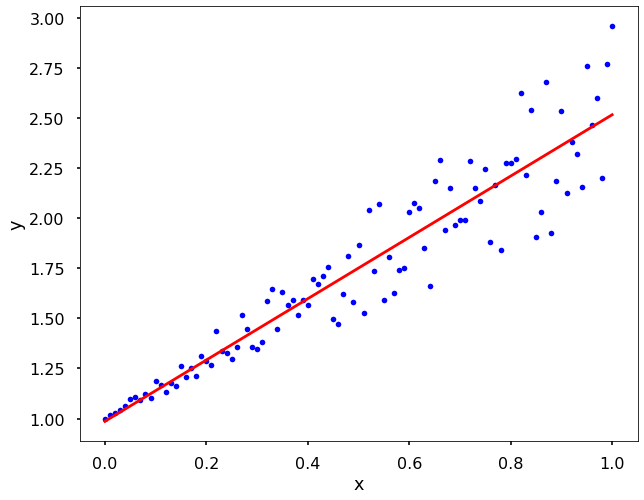

In [5]:
# Grafico de los resultados
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Uso de pseudoinversa

In [6]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.53036228]
 [0.98614708]]


## Uso de numpy.linalg.lstsq

In [7]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.53036228]
 [0.98614708]]


## Uso de optimize.curve_fit de scipy

In [9]:
# Generamos x y y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [10]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.59479505 0.98544117]


# Regresión de mínimos cuadrados para funciones no lineales

## Trucos logaritmicos para funciones exponenciales

In [11]:
# Generemos x y y aleatoriamente, y algun ruido de entrada en y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

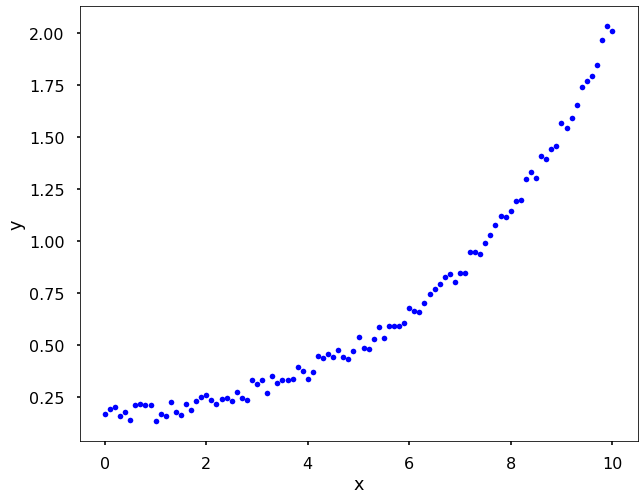

In [12]:
# Grafiquemos la data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ajsutemos la data antes de aplicar la transformacion logaritmica

In [13]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=0.14036890495469714, beta=0.2610957412191295


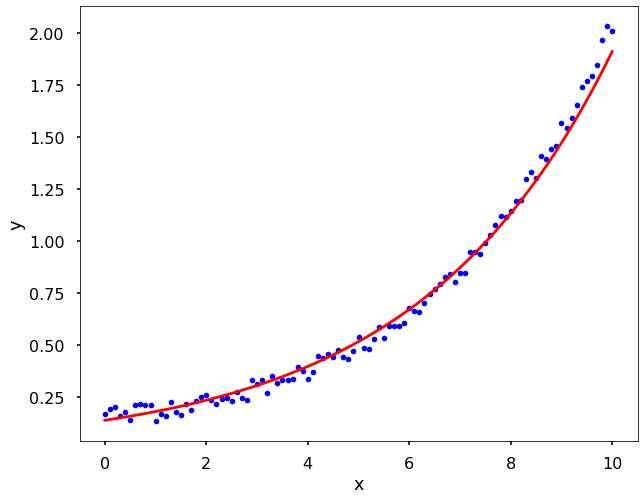

In [14]:
# Grafiquemos
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Trucos logaritmicos para funciones potencia

### Regresion Polinomial

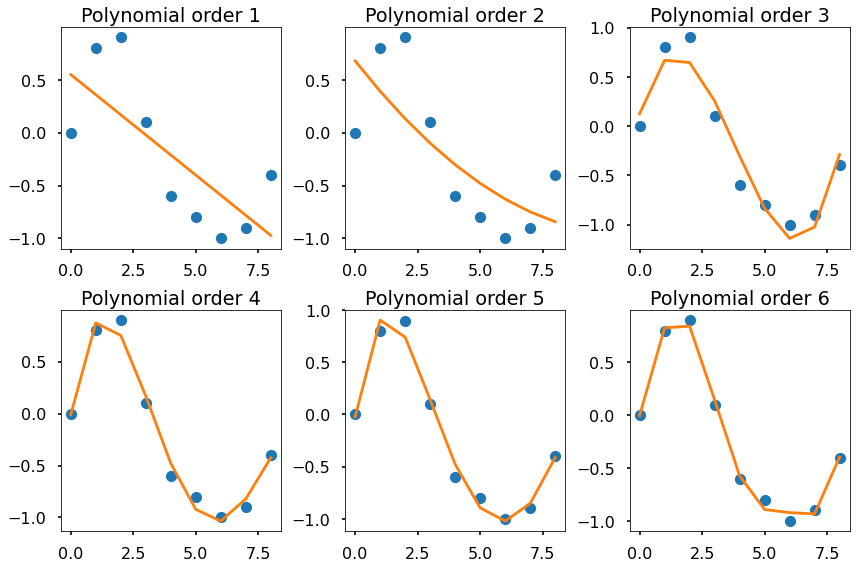

In [15]:
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):
    
    # obtenemos los coeficientes del polinomio
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluamos los valores para un polinomio
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

### Use optimize.curve_fit from scipy

In [16]:
# Definamos una funcion
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=0.1257854835677565, beta=0.27766895271451847


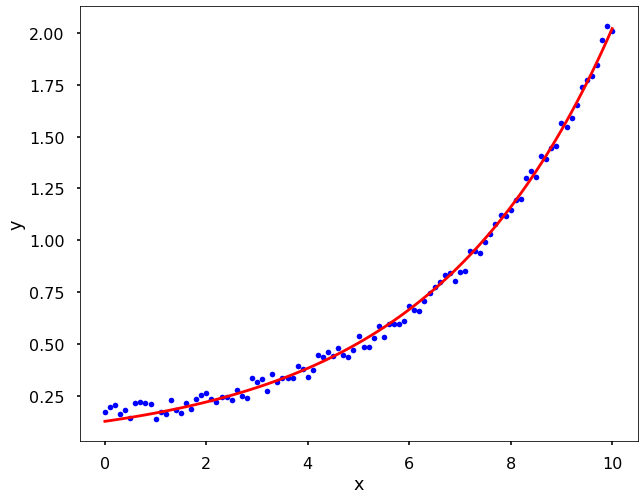

In [17]:
# Grafiquemos la data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()